### 21. 매장을 필터링해서 시각화하자

In [1]:
import pandas as pd
import os
from IPython.display import display, clear_output

os.chdir('/Users/yun-yeongjun/Desktop/Technique100/PythonML-main/PythonML-main/chapter01')

m_store = pd.read_csv('m_store.csv')
m_area = pd.read_csv('m_area.csv')
order_data = pd.read_csv('tbl_order_202104.csv')
order_data = pd.merge(order_data, m_store, on='store_id', how='left')
order_data = pd.merge(order_data, m_area, on='area_cd', how='left')

# 마스터에 없는 코드에 대응한 문자열 설정
order_data.loc[order_data['takeout_flag'] == 0, 'takeout_name'] = 'delivary'
order_data.loc[order_data['takeout_flag'] == 1, 'takeout_name'] = 'takeout'

order_data.loc[order_data['status'] == 0, 'status_name'] = '주문 접수'
order_data.loc[order_data['status'] == 1, 'status_name'] = '결제 완료'
order_data.loc[order_data['status'] == 2, 'status_name'] = '배달 완료'
order_data.loc[order_data['status'] == 9, 'status_name'] = '주문 취소'

order_data.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1,자양로점,SL,서울,서울,takeout,결제 완료
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2,가마산로2점,SL,서울,서울,delivary,배달 완료
2,71640388,195,C61227084,17,93678366,2021-04-01 11:00,2021-04-01 11:54,0,26470,9,화중로점,GB,경기,경기북부,delivary,주문 취소
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2,분포로점,BS,부산,부산,delivary,배달 완료
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2,하남산단점,GJ,광주,광주,delivary,배달 완료


In [5]:
# ipywidget의 드롭다운 기능을 이용해 매장을 선택할 수 있게 한다.
from ipywidgets import Dropdown

def order_by_store(val):
    clear_output()
    display(Dropdown)
    pick_data = order_data.loc[(order_data['store_name'] == val['new']) & (order_data['status'].isin([1,2]))]
    
    display(pick_data.head())
    
store_list = m_store['store_name'].to_list()

dropdown = Dropdown(options=store_list, description='지역 선택:')
dropdown.observe(order_by_store, names='value')
display(dropdown)

ipywidgets.widgets.widget_selection.Dropdown

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
69,75821507,2,C39916077,89,20828249,2021-04-01 11:04,2021-04-01 11:43,1,26030,1,세종대로점,SL,서울,서울,takeout,결제 완료
286,12439341,2,C41983039,58,89485581,2021-04-01 11:22,2021-04-01 11:33,0,32340,2,세종대로점,SL,서울,서울,delivary,배달 완료
583,39372433,2,C80973903,26,5757478,2021-04-01 11:46,2021-04-01 12:22,0,23880,2,세종대로점,SL,서울,서울,delivary,배달 완료
707,2730206,2,C41541685,79,72947540,2021-04-01 11:57,2021-04-01 12:37,1,28270,1,세종대로점,SL,서울,서울,takeout,결제 완료
1088,62218783,2,C15298395,47,24712892,2021-04-01 12:30,2021-04-01 12:43,0,23160,2,세종대로점,SL,서울,서울,delivary,배달 완료


* 위 order_by_store 함수에서 pick_data는 선택된 매장 이름에 해당하는 주문 데이터를 추출해서 화면에 출력한다.
    - isin으로 status가 1, 2인 데이터만 본 이유는 0와 9는 주문 접수와 취소에 해당하여 실제 결제가 이루어지지 않았으므로, 매출을 보기 위함일 땐 제외하는 것이 좋기 때문이다.
    

Dropdown(index=1, options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점', '당산로점', '남부순환로점', '성내로…

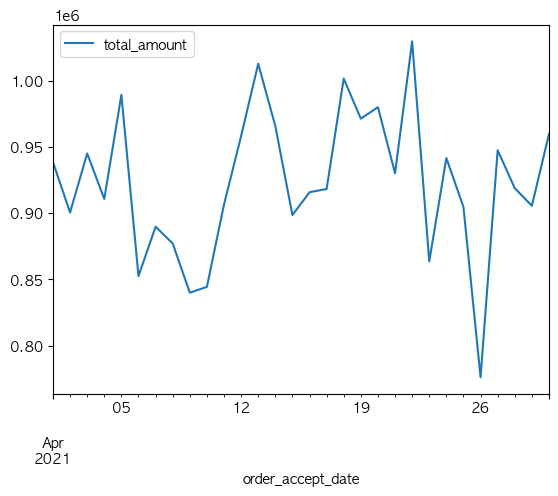

In [7]:
# 추출한 각 매장의 주문 데이터를 꺾은선 그래프로 시각화한다.
import matplotlib.pyplot as plt
%matplotlib inline

# 한글 폰트
if os.name == 'nt':
    plt.rc('font', family='Malgun Gothic')
elif os.name == 'posix':
    plt.rc('font', family='AppleGothic')
    
plt.rc('axes', unicode_minus=False)

def graph_by_store(val):
    clear_output()
    display(dropdown2)
    pick_data = order_data.loc[(order_data['store_name'] == val['new']) & (order_data['status'].isin([1,2]))]
    
    temp = pick_data[['order_accept_date', 'total_amount']].copy()
    temp.loc[:, 'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date', inplace=True)
    temp.resample('D').sum().plot()
    
dropdown2 = Dropdown(options=store_list)
dropdown2.observe(graph_by_store, names='value')
display(dropdown2)

### 22. 여러 매장의 상세 정보를 시각화하자

In [8]:
# 리스트박스로 선택한 매장의 결과를 표시해보자
from ipywidgets import SelectMultiple

def order_by_multi(val):
    clear_output()
    display(select)
    pick_data = order_data.loc[(order_data['store_name'].isin(val['new'])) & (order_data['status'].isin([1,2]))]
    
    display(pick_data.head())
    
select = SelectMultiple(options=store_list)
select.observe(order_by_multi, names='value')
display(select)

SelectMultiple(index=(1,), options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점', '당산로점', '남부순환…

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
69,75821507,2,C39916077,89,20828249,2021-04-01 11:04,2021-04-01 11:43,1,26030,1,세종대로점,SL,서울,서울,takeout,결제 완료
286,12439341,2,C41983039,58,89485581,2021-04-01 11:22,2021-04-01 11:33,0,32340,2,세종대로점,SL,서울,서울,delivary,배달 완료
583,39372433,2,C80973903,26,5757478,2021-04-01 11:46,2021-04-01 12:22,0,23880,2,세종대로점,SL,서울,서울,delivary,배달 완료
707,2730206,2,C41541685,79,72947540,2021-04-01 11:57,2021-04-01 12:37,1,28270,1,세종대로점,SL,서울,서울,takeout,결제 완료
1088,62218783,2,C15298395,47,24712892,2021-04-01 12:30,2021-04-01 12:43,0,23160,2,세종대로점,SL,서울,서울,delivary,배달 완료


SelectMultiple(description='매장 선택:', index=(0, 1, 2), options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계…

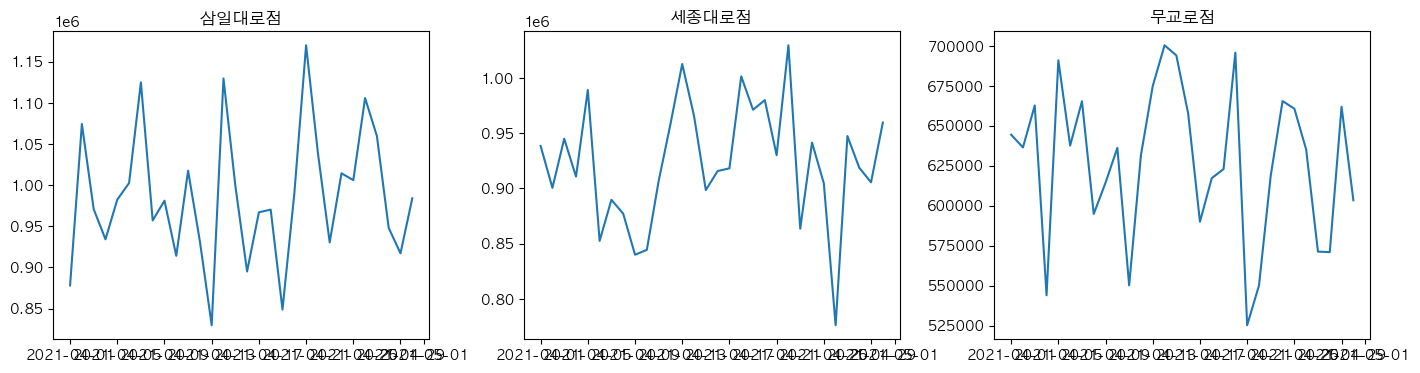

In [9]:
# 위에 대응하는 그래프
def graph_by_multi(val):
    clear_output()
    display(select2)
    
    fig = plt.figure(figsize=(17,4))
    plt.subplots_adjust(wspace=0.25, hspace=0.6)
    
    i=0
    for trg in val['new']:
        pick_data = order_data.loc[(order_data['store_name'] == trg) & (order_data['status'].isin([1,2]))]
        temp = pick_data[['order_accept_date', 'total_amount', 'store_name']].copy()
        temp.loc[:, 'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
        temp.set_index('order_accept_date', inplace=True)
        
        i+=1
        ax = fig.add_subplot(1, len(val['new']), i)
        ax.plot(temp.resample('D').sum())
        ax.set_title(trg)
        
select2 = SelectMultiple(options=store_list, description='매장 선택:')
select2.observe(graph_by_multi, names='value')
display(select2)

### 23. 슬라이드바를 이용해 주문 건수를 조사하자

In [10]:
# 슬라이드바를 이용해 주문 건수 간격을 설정하고 설정한 값보다 건수가 적거나 많은 매장을 확인하자
from ipywidgets import IntSlider

def store_lower(val):
    clear_output()
    display(slider)
    temp = order_data.groupby('store_name')
    print(temp.size()[temp.size() < val['new']])
    
slider = IntSlider(value=1100, min=1000, max=2000, step=100, description='건수:',)
slider.observe(store_lower, names='value')
display(slider)

IntSlider(value=1000, description='건수:', max=2000, min=1000, step=100)

store_name
광산로점       972
구청로점       884
국제금융로2점    735
남천동로점      976
대흥로점       815
덕수궁길점      993
도봉로2점      940
마린시티1로점    914
무교로점       848
복수서로점      878
봉화산로2점     966
봉화산로점      792
삼봉로점       998
삼일대로2점     969
상무번영로점     884
석봉로점       819
성내로점       937
성산동점       991
송정공원로점     885
시흥대로2점     970
올림픽로점      968
용운동점       853
월계로2점      998
월드컵대로2점    886
월드컵로점      917
은평로2점      854
장동로점       977
중동2로점      705
천호대로점      969
청계청로점      880
하남산단점      997
효원로점       795
dtype: int64


In [12]:
# 위는 설정한 값보다 큰 건수

def store_lower(val):
    clear_output()
    display(slider)
    temp = order_data.groupby('store_name')
    print(temp.size()[temp.size() >= val['new']])
    
slider = IntSlider(value=1100, min=1000, max=2000, step=100, description='건수:',)
slider.observe(store_lower, names='value')
display(slider)

IntSlider(value=1500, description='건수:', max=2000, min=1000, step=100)

store_name
남부순환로2점    1502
노해로2점      1613
녹사평대로2점    1535
무교로2점      1536
법원로점       2230
비아로점       1503
사우중로점      1583
사직로점       2263
서하로점       1501
송정해변로점     1534
온천천로점      1528
종로2점       1501
중앙대로점      2179
천호대로2점     1524
dtype: int64


### 24 토글 버튼을 이용해 지역 데이터를 추출하자
- 토글 버튼은 데이터를 전환할 때 적합하다.
- 22에서 만든 리스트와 비슷하지만 사용자 편의성이 높음
- 단, 선택지가 너무 많은 경우 화면이 버튼으로 가득하게 되므로 주의가 필요하다.

In [13]:
from ipywidgets import ToggleButtons

area_list = m_area['wide_area'].unique()

def order_by_area(val):
    clear_output()
    display(toggle)
    pick_data = order_data.loc[(order_data['wide_area'] == val['new']) & (order_data['status'].isin([1,2]))]
    display(pick_data.head())
    
toggle = ToggleButtons(options=area_list)
toggle.observe(order_by_area, names='value')
display(toggle)

ToggleButtons(index=3, options=('서울', '부산', '대전', '광주', '세종', '경기'), value='광주')

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2,하남산단점,GJ,광주,광주,delivary,배달 완료
5,86102793,167,C06298599,21,70395221,2021-04-01 11:00,2021-04-01 11:59,1,37420,1,서하로점,GJ,광주,광주,takeout,결제 완료
9,42415936,156,C00944252,84,82103008,2021-04-01 11:00,2021-04-01 11:30,1,23120,1,서남로점,GJ,광주,광주,takeout,결제 완료
24,31002402,156,C31333770,14,84683716,2021-04-01 11:01,2021-04-01 11:14,1,27320,1,서남로점,GJ,광주,광주,takeout,결제 완료
29,78042922,165,C36329759,4,44230243,2021-04-01 11:01,2021-04-01 11:59,0,47440,2,어등대로점,GJ,광주,광주,delivary,배달 완료


ToggleButtons(index=3, options=('서울', '부산', '대전', '광주', '세종', '경기'), value='광주')

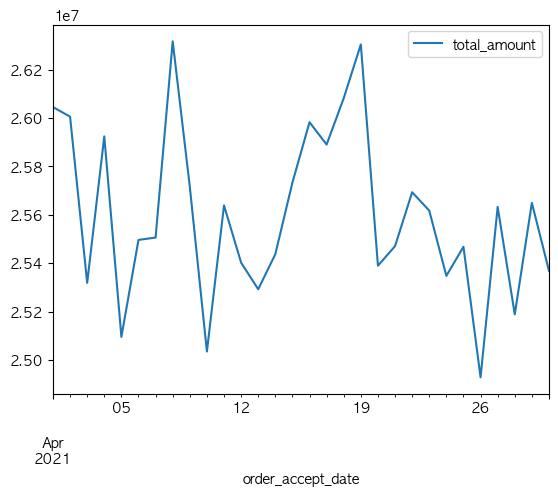

In [14]:
# 지역별 주문 정보 그래프

def graph_by_area(val):
    clear_output()
    display(toggle2)
    pick_data = order_data.loc[(order_data['wide_area'] == val['new']) & (order_data['status'].isin([1,2]))]
    
    temp = pick_data[['order_accept_date', 'total_amount']].copy()
    temp.loc[:, 'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date', inplace=True)
    temp.resample('D').sum().plot()
    
toggle2 = ToggleButtons(options=area_list)
toggle2.observe(graph_by_area, names='value')
display(toggle2)

### 25. 날짜를 지정해 데이터를 추출하자
- 데이터를 볼 때는 날짜나 기간으로 필터링하는 경우가 많다

In [15]:
from ipywidgets import DatePicker
import datetime

order_data.loc[:, 'order_date'] = pd.to_datetime(order_data['order_accept_date']).dt.date

def order_by_date(val):
    clear_output()
    display(date_picker)
    pick_data = order_data.loc[(order_data['order_date'] == val['new']) & (order_data['status'].isin([1,2]))]
    print(len(pick_data))
    display(pick_data.head())
    
date_picker = DatePicker(value=datetime.datetime(2021, 4, 1))
date_picker.observe(order_by_date, names='value')
display(date_picker)

DatePicker(value=datetime.date(2021, 4, 2))

6347


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
7783,17598958,58,C24777260,41,99201535,2021-04-02 11:00,2021-04-02 11:30,0,44620,2,관악로2점,SL,서울,서울,delivary,배달 완료,2021-04-02
7784,99539884,100,C97388234,38,91173108,2021-04-02 11:00,2021-04-02 11:28,0,24710,2,온천천로점,BS,부산,부산,delivary,배달 완료,2021-04-02
7785,44653345,3,C44461418,51,47840119,2021-04-02 11:00,2021-04-02 11:43,0,6980,2,무교로점,SL,서울,서울,delivary,배달 완료,2021-04-02
7786,98707466,154,C88935538,51,14093807,2021-04-02 11:00,2021-04-02 11:32,0,26470,2,봉선로점,GJ,광주,광주,delivary,배달 완료,2021-04-02
7787,29685119,116,C66631987,38,25606493,2021-04-02 11:00,2021-04-02 11:11,1,23280,1,해안새벽시장길점,BS,부산,부산,takeout,결제 완료,2021-04-02


In [17]:
# 기간 조회
min_date = datetime.date(2021, 4, 1)
max_date = datetime.date(2021, 4, 30)

def order_between_date():
    clear_output()
    display(date_picker_min)
    display(date_picker_max)
    pick_data = order_data.loc[
        (order_data['order_date'] >= min_date) &
        (order_data['order_date'] <= max_date) &
        (order_data['status'].isin([1,2]))]
    print(len(pick_data))
    display(pick_data.head())
    
# 가장 이른 날짜를 변수에 설정하는 함수
def set_min_date(val):
    global min_date
    min_date = val['new']
    order_between_date()
    
# 가장 느린 날짜 설정 함수
def set_max_date(val):
    global max_date
    max_date = val['new']
    order_between_date()
    
date_picker_min = DatePicker(value=min_date)
date_picker_min.observe(set_min_date, names='value')
print('기간 시작')
display(date_picker_min)

date_picker_max = DatePicker(value=max_date)
date_picker_max.observe(set_max_date, names='value')
print('기간 끝')
display(date_picker_max)


DatePicker(value=datetime.date(2021, 4, 1))

DatePicker(value=datetime.date(2021, 4, 20))

126775


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1,자양로점,SL,서울,서울,takeout,결제 완료,2021-04-01
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2,가마산로2점,SL,서울,서울,delivary,배달 완료,2021-04-01
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2,분포로점,BS,부산,부산,delivary,배달 완료,2021-04-01
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2,하남산단점,GJ,광주,광주,delivary,배달 완료,2021-04-01
5,86102793,167,C06298599,21,70395221,2021-04-01 11:00,2021-04-01 11:59,1,37420,1,서하로점,GJ,광주,광주,takeout,결제 완료,2021-04-01
